#**SUBMISSION KELAS BELAJAR MACHINE LEARNING UNTUK PEMULA**

---
Nama: Nabilah Argyanti Ardyningrum

Username: nargyanti

Email: nargyanti@gmail.com

Domisili: Kabupaten Malang, Jawa Timur

Akun Dicoding: [Nabilah Argyanti Ardyningrum](https://www.dicoding.com/users/nargyanti).

---

In [1]:
import tensorflow as tf
import zipfile
import os
import shutil
from tensorflow.keras.preprocessing.image import ImageDataGenerator

print(tf.__version__)

2.4.1


In [2]:
!wget --no-check-certificate \
  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip

--2021-05-05 16:49:53--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘rockpaperscissors.zip’

rockpaperscissors.z 100%[===================>] 307.92M  1.82MB/s    in 3m 20s  

2021-05-05 16:53:14 (1.54 MB/s) - ‘rockpaperscissors.zip’ saved [322873683/322873683]



In [3]:
# Extract zip
local_zip = 'rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

base_dir = '/tmp/rockpaperscissors'

In [4]:
# Delete unnecessary file and folder
shutil.rmtree(os.path.join(base_dir, 'rps-cv-images'))
os.remove(os.path.join(base_dir, 'README_rpc-cv-images.txt'))

In [5]:
# View the contents of base_dir directory
os.listdir(base_dir)

['scissors', 'rock', 'paper']

In [19]:
# Augmentation using ImageDataGenerator
datagen = ImageDataGenerator(
            rescale = 1./255,
            rotation_range = 20,
            vertical_flip = True,
            horizontal_flip = True,
            shear_range = 0.2,
            fill_mode = 'nearest',
            validation_split = 0.4)

In [32]:
# Prepare training data and data validation that will be learned by the model
train_generator = datagen.flow_from_directory(
                    base_dir,
                    target_size = (150, 150), 
                    batch_size = 18,
                    color_mode ='rgb',
                    class_mode = 'categorical',
                    shuffle=True,
                    subset='training') 

validation_generator = datagen.flow_from_directory(
                    base_dir,
                    target_size = (150, 150), 
                    batch_size = 19,
                    color_mode ='rgb',
                    class_mode = 'categorical',
                    shuffle=True,
                    subset='validation')

Found 1314 images belonging to 3 classes.
Found 874 images belonging to 3 classes.


In [33]:
# Create CNN model
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(256, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

In [34]:
# Compile model
model.compile(loss='categorical_crossentropy',
              optimizer=tf.optimizers.Adam(),
              metrics=['accuracy'])

In [35]:
# Train the model using fit method
model.fit(
      train_generator,
      steps_per_epoch=20, 
      epochs=20, 
      validation_data=validation_generator, 
      validation_steps=5, 
      verbose=2)

Epoch 1/20
20/20 - 20s - loss: 1.1025 - accuracy: 0.3111 - val_loss: 1.0957 - val_accuracy: 0.2842
Epoch 2/20
20/20 - 19s - loss: 1.0675 - accuracy: 0.4306 - val_loss: 0.9599 - val_accuracy: 0.4737
Epoch 3/20
20/20 - 19s - loss: 0.8442 - accuracy: 0.6611 - val_loss: 0.6602 - val_accuracy: 0.7158
Epoch 4/20
20/20 - 19s - loss: 0.4648 - accuracy: 0.8056 - val_loss: 0.2791 - val_accuracy: 0.9158
Epoch 5/20
20/20 - 19s - loss: 0.3676 - accuracy: 0.8750 - val_loss: 0.2925 - val_accuracy: 0.8632
Epoch 6/20
20/20 - 19s - loss: 0.3305 - accuracy: 0.8639 - val_loss: 0.1795 - val_accuracy: 0.9368
Epoch 7/20
20/20 - 18s - loss: 0.3139 - accuracy: 0.9000 - val_loss: 0.2482 - val_accuracy: 0.9579
Epoch 8/20
20/20 - 18s - loss: 0.1996 - accuracy: 0.9250 - val_loss: 0.3199 - val_accuracy: 0.9158
Epoch 9/20
20/20 - 18s - loss: 0.2877 - accuracy: 0.8944 - val_loss: 0.3782 - val_accuracy: 0.9158
Epoch 10/20
20/20 - 18s - loss: 0.2040 - accuracy: 0.9306 - val_loss: 0.2898 - val_accuracy: 0.9474
Epoch 11/

In [36]:
# Check accuracy score for train_generator
train_score = model.evaluate(train_generator)

73/73 [==============================] - 24s 327ms/step - loss: 0.0761 - accuracy: 0.9802


In [38]:
# Check accuracy score for validation_generator
validation_score = model.evaluate(validation_generator)

46/46 [==============================] - 15s 331ms/step - loss: 0.0989 - accuracy: 0.9783


Saving Rock-paper-scissors_(paper).png to Rock-paper-scissors_(paper).png
Rock-paper-scissors_(paper).png
Paper


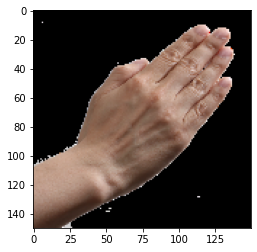

In [43]:
# Main program
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

uploaded = files.upload()

for fn in uploaded.keys():
  
  path = fn
  img = image.load_img(path, target_size=(150, 150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=32)

  print(fn)
  if classes[0,0]==1:
    print('Paper')
  elif classes[0,1]==1:
    print('Rock')
  else:
    print('Scissors')